In [6]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 MB 10.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 10.0 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 10.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 6.7 MB/s eta 0:00:00a 0:00:01


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight

In [37]:
train_path = '/Users/himakshinagpal/Desktop/minor_srm/Lungs_heart_hybrid_dataset/Bacterial Pneumonia'
test_path ='/Users/himakshinagpal/Desktop/minor_srm/Lungs_heart_hybrid_dataset/Bacterial Pneumonia'
valid_path = '/Users/himakshinagpal/Desktop/minor_srm/Lungs_heart_hybrid_dataset/Bacterial Pneumonia'

batch_size = 16
img_height = 500
img_width = 500

In [39]:
image_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_data_gen = ImageDataGenerator(rescale=1./255)

In [41]:
train = image_gen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    class_mode='binary',
    batch_size=batch_size
)

test = test_data_gen.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    class_mode='binary',
    batch_size=batch_size,
    shuffle=False
)

valid = test_data_gen.flow_from_directory(
    valid_path,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    class_mode='binary',
    batch_size=batch_size
)

Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.


In [43]:
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))

cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
early = EarlyStopping(monitor='val_loss', mode='min', patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.3, min_lr=0.000001)
callbacks_list = [early, learning_rate_reduction]

In [53]:
# Train the model
history = cnn.fit(
    train,
    epochs=25,
    validation_data=valid,
    # class_weight=cw,  # Optional, only if you have class imbalance
    callbacks=callbacks_list
)

Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0000e+00 - loss: 0.7179 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 3.0000e-04


In [57]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Assuming you have already created the train generator
# Get the class indices from the generator
class_indices = train.class_indices
class_labels = list(class_indices.keys())

# Get the class labels from the generator
y_train = train.classes

# Compute class weights
weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
cw = dict(zip(class_labels, weights))

# Now you can use cw in the fit method
history = cnn.fit(
    train,
    epochs=25,
    validation_data=valid,
    class_weight=cw,  # Use class weights here
    callbacks=callbacks_list
)

Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 3.0000e-04
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 3.0000e-04
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 3: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 3.0000e-04
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 9.0000e-05


In [59]:
cnn.fit(train, epochs=25, validation_data=valid, class_weight=cw, callbacks=callbacks_list)

Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 9.0000e-05
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 9.0000e-05
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 3: ReduceLROnPlateau reducing learning rate to 2.700000040931627e-05.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 9.0000e-05
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 2.7000e-05


In [61]:
test_accu = cnn.evaluate(test)
print('The testing accuracy is:', test_accu[1] * 100, '%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 0.0000e+00
The testing accuracy is: 100.0 %


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


In [63]:
preds = cnn.predict(test, verbose=1)
predictions = (preds > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [65]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = cnn.evaluate(test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Test Loss: 0.0000
Test Accuracy: 100.00%


In [67]:
# Make predictions on the test dataset
predictions = cnn.predict(test)

# Convert predictions to binary (0 or 1)
predicted_classes = (predictions > 0.5).astype(int)

# Display the predicted classes
print(predicted_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[0]]


In [75]:
# Get the true labels
true_classes = test.classes

# Get the class labels
class_labels = list(test.class_indices.keys())

# Plot some predictions
import matplotlib.pyplot as plt

# Number of images to display
num_images = 5

# Randomly select indices
indices = np.random.choice(len(predicted_classes), num_images, replace=False)
plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(test[idx][0][0].reshape(img_height, img_width), cmap='gray')  # Adjust for grayscale
    plt.title(f'True: {class_labels[true_classes[idx]]}\nPred: {class_labels[predicted_classes[idx][0]]}')
    plt.axis('off')
plt.show()

ValueError: Cannot take a larger sample than population when 'replace=False'

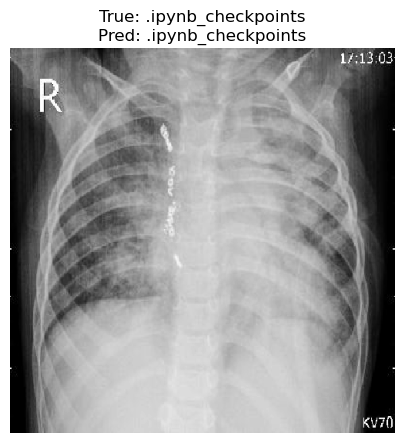

In [77]:
# Get the true labels
true_classes = test.classes

# Get the class labels
class_labels = list(test.class_indices.keys())

# Determine the number of images to display
num_images = min(5, len(predicted_classes))  # Ensure we don't exceed the available images

# Randomly select indices
indices = np.random.choice(len(predicted_classes), num_images, replace=False)

# Plot some predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(test[idx][0][0].reshape(img_height, img_width), cmap='gray')  # Adjust for grayscale
    plt.title(f'True: {class_labels[true_classes[idx]]}\nPred: {class_labels[predicted_classes[idx][0]]}')
    plt.axis('off')
plt.show()

In [79]:
cnn.save('xray_cnn_model.h5')

In [81]:
from tensorflow.keras.models import load_model
loaded_model = load_model('xray_cnn_model.h5')

In [83]:
from tensorflow.keras.models import load_model
loaded_model = load_model('xray_cnn_model.h5')
loaded_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [85]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = loaded_model.evaluate(test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Test Loss: 0.0000
Test Accuracy: 100.00%


In [87]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('xray_cnn_model.h5')

# Compile the model again
loaded_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Evaluate the model on the test dataset
test_loss, test_accuracy = loaded_model.evaluate(test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Test Loss: 0.0000
Test Accuracy: 100.00%
